In [40]:
import pandas as pd
import plotly.express as px
from jupyter_dash import JupyterDash
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from threading import Thread
from IPython.display import IFrame, display


# Retrieve Data

In [41]:
url = "http://127.0.0.1:9090/bompollen"


payload = {
    "name": "rocklea"
}

# Send the POST request with headers and JSON data
response = requests.post(url, data=json.dumps(payload))
if response.status_code == 200:
    data_rocklea = response.json()
else:
    print(f"Failed to get data: {response.status_code}")


In [42]:
df_rocklea = pd.DataFrame(data_rocklea)
#df_rocklea

In [43]:
url = "http://127.0.0.1:9090/bompollen"


payload = {
    "name": "canberra"
}

# Send the POST request with headers and JSON data
response = requests.post(url, data=json.dumps(payload))
if response.status_code == 200:
    data_canberra = response.json()
else:
    print(f"Failed to get data: {response.status_code}")

In [44]:
df_canberra = pd.DataFrame(data_canberra)
#df_canberra

In [45]:
url = "http://127.0.0.1:9090/bompollen"


payload = {
    "name": "parkville"
}

# Send the POST request with headers and JSON data
response = requests.post(url, data=json.dumps(payload))
if response.status_code == 200:
    data_parkville = response.json()
else:
    print(f"Failed to get data: {response.status_code}")

In [46]:
df_parkville = pd.DataFrame(data_parkville)
#df_parkville

In [47]:
url = "http://127.0.0.1:9090/bompollen"


payload = {
    "name": "campbelltown"
}

# Send the POST request with headers and JSON data
response = requests.post(url, data=json.dumps(payload))
if response.status_code == 200:
    data_campbelltown = response.json()
else:
    print(f"Failed to get data: {response.status_code}")

In [48]:
df_campbelltown = pd.DataFrame(data_campbelltown)
#df_campbelltown

In [49]:
# Merge DataFrames
df = pd.concat([df_rocklea, df_canberra, df_parkville, df_campbelltown], ignore_index=True)
#df

# Process Data

In [50]:
expected_columns = ['location', 'pollen_total', 'rel_hum', 'air_temp', 'gust_kmh', 'wind_spd_kmh']
if all(column in df.columns for column in expected_columns):
    df['local_date_time_full'] = pd.to_datetime(df['local_date_time_full'])
    df.set_index('local_date_time_full', inplace=True)
    
    # Print DataFrame to check data
    print("DataFrame after setting datetime index:\n", df.head())
else:
    missing_columns = [column for column in expected_columns if column not in df.columns]
    print(f"The DataFrame does not contain the expected columns: {missing_columns}")


DataFrame after setting datetime index:
                           location  air_temp  apparent_t  dewpt  gust_kmh  \
local_date_time_full                                                        
2024-05-19 17:00:00+00:00  rocklea      19.7        17.0    7.4      20.0   
2024-05-19 16:00:00+00:00  rocklea      20.5        17.9    7.8      20.0   
2024-05-19 16:00:00+00:00  rocklea      21.6        19.8    7.8      13.0   
2024-05-19 15:00:00+00:00  rocklea      21.9        20.1    8.1      13.0   
2024-05-19 15:00:00+00:00  rocklea      22.5        20.6    7.5      20.0   

                           rel_hum  wind_spd_kmh  pollen_total  
local_date_time_full                                            
2024-05-19 17:00:00+00:00       45          11.0    139.622876  
2024-05-19 16:00:00+00:00       44          11.0    144.263912  
2024-05-19 16:00:00+00:00       41           7.0    133.753521  
2024-05-19 15:00:00+00:00       41           7.0    147.747729  
2024-05-19 15:00:00+00:00    

/var/folders/1z/hw1jxlsd21s7yb67j6qr4yzc0000gn/T/ipykernel_12563/4239810900.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [51]:
# Check if all expected columns are present
if all(column in df.columns for column in expected_columns):
    print("DataFrame after setting datetime index:\n", df.head())
else:
    missing_columns = [column for column in expected_columns if column not in df.columns]
    print(f"The DataFrame does not contain the expected columns: {missing_columns}")

DataFrame after setting datetime index:
                           location  air_temp  apparent_t  dewpt  gust_kmh  \
local_date_time_full                                                        
2024-05-19 17:00:00+00:00  rocklea      19.7        17.0    7.4      20.0   
2024-05-19 16:00:00+00:00  rocklea      20.5        17.9    7.8      20.0   
2024-05-19 16:00:00+00:00  rocklea      21.6        19.8    7.8      13.0   
2024-05-19 15:00:00+00:00  rocklea      21.9        20.1    8.1      13.0   
2024-05-19 15:00:00+00:00  rocklea      22.5        20.6    7.5      20.0   

                           rel_hum  wind_spd_kmh  pollen_total  
local_date_time_full                                            
2024-05-19 17:00:00+00:00       45          11.0    139.622876  
2024-05-19 16:00:00+00:00       44          11.0    144.263912  
2024-05-19 16:00:00+00:00       41           7.0    133.753521  
2024-05-19 15:00:00+00:00       41           7.0    147.747729  
2024-05-19 15:00:00+00:00    

# Visualize Data

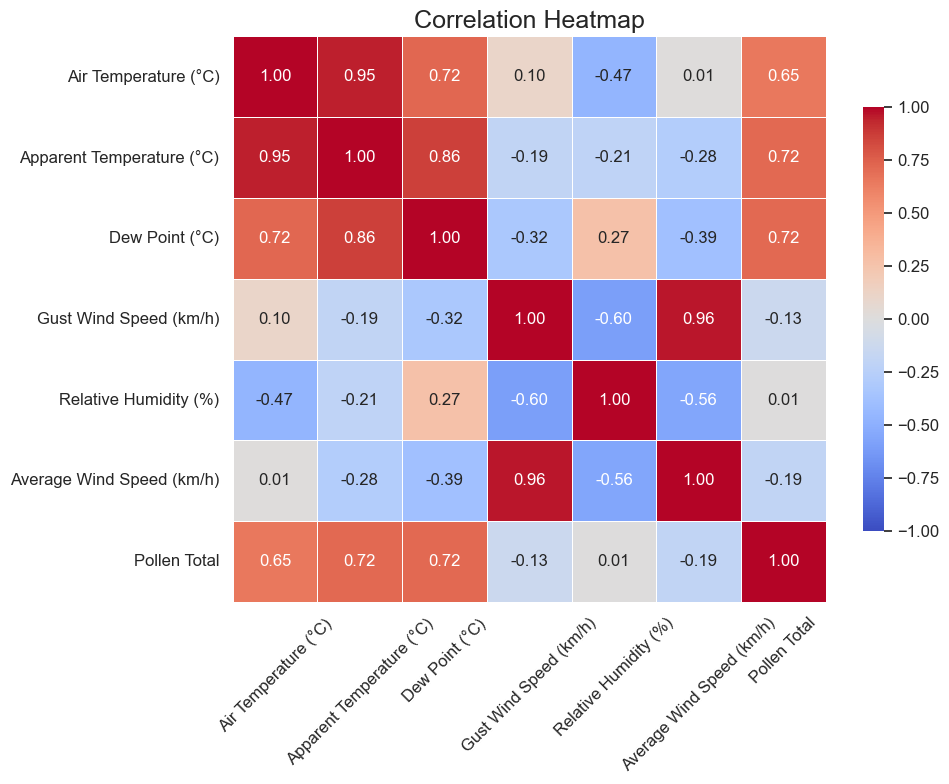

In [52]:
# Rename columns
df_renamed = df.rename(columns={
    'air_temp': 'Air Temperature (°C)',
    'apparent_t': 'Apparent Temperature (°C)',
    'dewpt': 'Dew Point (°C)',
    'gust_kmh': 'Gust Wind Speed (km/h)',
    'rel_hum': 'Relative Humidity (%)',
    'wind_spd_kmh': 'Average Wind Speed (km/h)',
    'pollen_total': 'Pollen Total'
})

# Select numeric columns
numeric_df = df_renamed.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
corr = numeric_df.corr()

# Set plot style
sns.set(style='whitegrid')

# Plot heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
                      annot_kws={"size": 12}, fmt=".2f", linewidths=.5, cbar_kws={"shrink": .75})

# Set title and labels
heatmap.set_title('Correlation Heatmap', fontsize=18)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=12, rotation=45)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=12, rotation=0)

# Adjust colorbar label size
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)

# Display the plot
plt.tight_layout()
plt.show()


### Pollen Distribution

In [53]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots



fig_box = make_subplots(rows=1, cols=3, subplot_titles=("Pollen Total", "Air Temperature (°C)", "Relative Humidity (%)"))

fig_box.add_trace(go.Box(
    y=df['pollen_total'], 
    name='Pollen Total', 
    marker_color='lightblue', 
    boxmean='sd',
    hovertemplate='Max: %{y.upperfence:.2f}<br>Upper Quartile: %{y.upperq:.2f}<br>Mean: %{y.mean:.2f} ± %{y.sd:.2f}<br>Median: %{y.median:.2f}<br>Lower Quartile: %{y.lowerq:.2f}<br>Min: %{y.lowerfence:.2f}<extra></extra>'
), row=1, col=1)

fig_box.add_trace(go.Box(
    y=df['air_temp'], 
    name='Air Temperature (°C)', 
    marker_color='lightcoral', 
    boxmean='sd',
    hovertemplate='Max: %{y.upperfence:.2f}<br>Upper Quartile: %{y.upperq:.2f}<br>Mean: %{y.mean:.2f} ± %{y.sd:.2f}<br>Median: %{y.median:.2f}<br>Lower Quartile: %{y.lowerq:.2f}<br>Min: %{y.lowerfence:.2f}<extra></extra>'
), row=1, col=2)

fig_box.add_trace(go.Box(
    y=df['rel_hum'], 
    name='Relative Humidity (%)', 
    marker_color='lightgreen', 
    boxmean='sd',
    hovertemplate='Max: %{y.upperfence:.2f}<br>Upper Quartile: %{y.upperq:.2f}<br>Mean: %{y.mean:.2f} ± %{y.sd:.2f}<br>Median: %{y.median:.2f}<br>Lower Quartile: %{y.lowerq:.2f}<br>Min: %{y.lowerfence:.2f}<extra></extra>'
), row=1, col=3)

fig_box.update_layout(
    title={
        'text': 'Box Plots of Pollen Total, Air Temperature, and Relative Humidity',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    plot_bgcolor='white',
    font=dict(family="Arial, sans-serif", size=12, color="black"),
    showlegend=True,
    legend=dict(title='Variables', x=1, y=0.5),
    margin=dict(l=20, r=20, t=80, b=20),
    paper_bgcolor='white'
)

for i in range(1, 4):
    fig_box.update_xaxes(showgrid=True, gridcolor='LightGray', row=1, col=i)
    fig_box.update_yaxes(showgrid=True, gridcolor='LightGray', row=1, col=i)

fig_box.show()


In [54]:
fig_hist = px.histogram(df, x='pollen_total', nbins=20, title='Distribution of Pollen Total',
                        labels={'pollen_total': 'Pollen Total'},
                        color_discrete_sequence=['#1E90FF'])  

fig_hist.update_traces(
    hovertemplate='<b>Pollen Total:</b> %{x:.2f}<br><b>Count:</b> %{y}<extra></extra>',
    marker=dict(line=dict(color='#000000', width=1))
)

fig_hist.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='LightGray'),
    yaxis=dict(showgrid=True, gridcolor='LightGray'),
    font=dict(family="Arial, sans-serif", size=12, color="black"),
    title_x=0.5
)

fig_hist.show()

### Pollen Count、Air Temperature and Humidity over Time

In [55]:
fig = go.Figure()


if 'pollen_total' in df.columns and 'location' in df.columns:
   
    locations = df['location'].unique()
    
    colors = px.colors.qualitative.Plotly

    for i, location in enumerate(locations):
        df_location = df[df['location'] == location]
        
        fig.add_trace(go.Scatter(
            x=df_location.index,
            y=df_location['pollen_total'],
            mode='markers+lines',
            name=location,  
            marker=dict(
                color=colors[i % len(colors)],  
                showscale=False  
            ),
            line=dict(
                color=colors[i % len(colors)]
            ),
            hovertemplate=f'{location}<br>Pollen Count: %{{y}}<extra></extra>'  
        ))

    fig.update_layout(
        title={
            'text': 'Pollen Total Over Time by Different Location',
            'y': 0.9,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        xaxis_title='Time',
        yaxis_title='Pollen Total',
        hovermode='x unified',  
        plot_bgcolor='rgba(0,0,0,0)',
        xaxis=dict(
            showgrid=True,
            gridcolor='LightGray',
            tickangle=-45  
        ),
        yaxis=dict(
            showgrid=True,
            gridcolor='LightGray'
        ),
        legend=dict(
            title='Location',
            orientation='h',  
            yanchor='top',
            y=-0.5,  
            xanchor='center',
            x=0.5
        ),
        font=dict(
            family="Arial, sans-serif",
            size=12,
            color="black"
        ),
        margin=dict(
            l=40,
            r=40,
            t=80,
            b=120  
        )
    )

    fig.show()

In [56]:

fig = go.Figure()

if 'air_temp' in df.columns and 'location' in df.columns:
   
    locations = df['location'].unique()
    
    colors = px.colors.qualitative.Plotly

    for i, location in enumerate(locations):
        df_location = df[df['location'] == location]
        
        fig.add_trace(go.Scatter(
            x=df_location.index,
            y=df_location['air_temp'],
            mode='markers+lines',
            name=location,  
            marker=dict(
                color=colors[i % len(colors)],  
                showscale=False  
            ),
            line=dict(
                color=colors[i % len(colors)]
            ),
            hovertemplate=f'{location}<br>Air Temperature: %{{y}}°C<extra></extra>'  
        ))

    fig.update_layout(
        title={
            'text': 'Air Temperature Over Time by Different Location',
            'y': 0.9,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        xaxis_title='Time',
        yaxis_title='Air Temperature (°C)',
        hovermode='x unified', 
        plot_bgcolor='rgba(0,0,0,0)',
        xaxis=dict(
            showgrid=True,
            gridcolor='LightGray',
            tickangle=-45 
        ),
        yaxis=dict(
            showgrid=True,
            gridcolor='LightGray'
        ),
        legend=dict(
            title='Location',
            orientation='h',  
            yanchor='top',
            y=-0.5,  
            xanchor='center',
            x=0.5
        ),
        font=dict(
            family="Arial, sans-serif",
            size=12,
            color="black"
        ),
        margin=dict(
            l=40,
            r=40,
            t=80,
            b=120  
        )
    )

    fig.show()

In [57]:

fig = go.Figure()


if 'rel_hum' in df.columns and 'location' in df.columns:
  
    locations = df['location'].unique()

    colors = px.colors.qualitative.Plotly

    for i, location in enumerate(locations):
        df_location = df[df['location'] == location]
        
        fig.add_trace(go.Scatter(
            x=df_location.index,
            y=df_location['rel_hum'],
            mode='markers+lines',
            name=location,  
            marker=dict(
                color=colors[i % len(colors)], 
                showscale=False  
            ),
            line=dict(
                color=colors[i % len(colors)]
            ),
            hovertemplate=f'{location}<br>Relative Humidity: %{{y}}%<extra></extra>'  
        ))

    fig.update_layout(
        title={
            'text': 'Relative Humidity Over Time by Different Location',
            'y': 0.9,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        xaxis_title='Time',
        yaxis_title='Relative Humidity (%)',
        hovermode='x unified', 
        plot_bgcolor='rgba(0,0,0,0)',
        xaxis=dict(
            showgrid=True,
            gridcolor='LightGray',
            tickangle=-45 
        ),
        yaxis=dict(
            showgrid=True,
            gridcolor='LightGray'
        ),
        legend=dict(
            title='Location',
            orientation='h',  
            yanchor='top',
            y=-0.5,  
            xanchor='center',
            x=0.5
        ),
        font=dict(
            family="Arial, sans-serif",
            size=12,
            color="black"
        ),
        margin=dict(
            l=40,
            r=40,
            t=80,
            b=120  
        )
    )

    fig.show()

In [58]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Distribution of Gust Wind Speed", "Distribution of Average Wind Speed"))

gust_wind_speed_hist = px.histogram(df, x='gust_kmh', nbins=20, labels={'gust_kmh': 'Gust Wind Speed (km/h)'})
gust_wind_speed_hist.update_traces(
    hovertemplate='<b>Gust Wind Speed:</b> %{x:.2f} km/h<br><b>Count:</b> %{y}<extra></extra>',
    marker=dict(color='#636EFA', line=dict(color='#000000', width=1))
)

average_wind_speed_hist = px.histogram(df, x='wind_spd_kmh', nbins=20, labels={'wind_spd_kmh': 'Average Wind Speed (km/h)'})
average_wind_speed_hist.update_traces(
    hovertemplate='<b>Average Wind Speed:</b> %{x:.2f} km/h<br><b>Count:</b> %{y}<extra></extra>',
    marker=dict(color='#EF553B', line=dict(color='#000000', width=1))
)

for trace in gust_wind_speed_hist.data:
    fig.add_trace(trace, row=1, col=1)

for trace in average_wind_speed_hist.data:
    fig.add_trace(trace, row=1, col=2)

fig.update_layout(
    title_text='Distribution of Wind Speeds',
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(family="Arial, sans-serif", size=12, color="black"),
    xaxis=dict(showgrid=True, gridcolor='LightGray'),
    yaxis=dict(showgrid=True, gridcolor='LightGray'),
    xaxis2=dict(showgrid=True, gridcolor='LightGray'),
    yaxis2=dict(showgrid=True, gridcolor='LightGray')
)

fig.show()


### Pollen vs Different Variables 

In [59]:
fig = px.scatter(df, x='air_temp', y='pollen_total', color='pollen_total',
                 title='Pollen Total vs Air Temperature',
                 labels={'air_temp': 'Air Temperature (°C)', 'pollen_total': 'Pollen Total'},
                 color_continuous_scale='Sunset')

fig.update_traces(
    hovertemplate='<b>Time:</b> %{customdata}<br>' +
                  '<b>Air Temperature:</b> %{x:.1f}<br>' +
                  '<b>Pollen Total:</b> %{y:.2f}<extra></extra>',
    customdata=df.index.strftime('%Y-%m-%d %H:%M:%S')
)

fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='LightGray'),
    yaxis=dict(showgrid=True, gridcolor='LightGray'),
    font=dict(family="Arial, sans-serif", size=12, color="black"),
    title=dict(text='Pollen Total vs Air Temperature', x=0.5, xanchor='center', yanchor='top'),
    coloraxis_colorbar=dict(title='Pollen Total')
)

fig.show()


In [60]:
fig = px.scatter(df, x='rel_hum', y='pollen_total', color='rel_hum',
                 title='Pollen Total vs Relative Humidity',
                 labels={'rel_hum': 'Relative Humidity (%)', 'pollen_total': 'Pollen Total'},
                 color_continuous_scale='Sunset')

fig.update_traces(
    hovertemplate='<b>Time:</b> %{customdata}<br>' +
                  '<b>Relative Humidity:</b> %{x:.1f}%<br>' +
                  '<b>Pollen Total:</b> %{y:.2f}<extra></extra>',
    customdata=df.index.strftime('%Y-%m-%d %H:%M:%S')
)

fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    xaxis=dict(showgrid=True, gridcolor='LightGray'),
    yaxis=dict(showgrid=True, gridcolor='LightGray'),
    font=dict(family="Arial, sans-serif", size=12, color="black"),
    title=dict(text='Pollen Total vs Relative Humidity', x=0.5, xanchor='center', yanchor='top'),
    coloraxis_colorbar=dict(title='Relative Humidity')
)

fig.show()


In [61]:

sizeref = df['pollen_total'].max() / 30  

fig = px.scatter(df, x='gust_kmh', y='wind_spd_kmh', size='pollen_total', color='pollen_total',
                 title='Relationship Between Gust Wind Speed, Average Wind Speed, and Pollen Total',
                 labels={'gust_kmh': 'Gust Wind Speed (km/h)', 'wind_spd_kmh': 'Average Wind Speed (km/h)', 'pollen_total': 'Pollen Total'},
                 size_max=15,  
                 color_continuous_scale='Viridis')

fig.update_traces(marker=dict(opacity=0.7, line=dict(width=1.5, color='DarkSlateGrey'),
                              sizemode='diameter', sizeref=sizeref),
                  hovertemplate='<b>Date:</b> %{customdata}<br>' +
                                '<b>Gust Wind Speed:</b> %{x:.2f} km/h<br>' +
                                '<b>Average Wind Speed:</b> %{y:.2f} km/h<br>' +
                                '<b>Pollen Total:</b> %{marker.size:.2f}<extra></extra>',
                  customdata=df.index.strftime('%Y-%m-%d %H:%M:%S'))  

fig.update_layout(
    title={
        'text': 'Relationship Between Gust Wind Speed, Average Wind Speed, and Pollen Total',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    xaxis=dict(
        title='Gust Wind Speed (km/h)',
        showgrid=True,
        gridcolor='LightGray'
    ),
    yaxis=dict(
        title='Average Wind Speed (km/h)',
        showgrid=True,
        gridcolor='LightGray'
    ),
    plot_bgcolor='white',
    font=dict(
        family="Arial, sans-serif",
        size=12,
        color="black"
    ),
    coloraxis_colorbar=dict(
        title='Pollen Total'
    )
)

fig.show()


## Design an Interactive Dashboard

In [62]:
# Initialize the Dash app
app = Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1("Pollen Data Analysis", style={'text-align': 'center', 'color': '#333', 'font-family': 'Arial, sans-serif'}),
    
    # Define the tabs
    dcc.Tabs([
        # Tab 1: Pollen Distribution
        dcc.Tab(label='Pollen Distribution', children=[
            html.Div([
                # Dropdown for selecting location
                dcc.Dropdown(
                    id='location-dropdown',
                    options=[{'label': loc, 'value': loc} for loc in df['location'].unique()],
                    value=df['location'].unique()[0],
                    clearable=False,
                    style={'width': '50%', 'margin': 'auto', 'font-family': 'Arial, sans-serif'}
                ),
                # Graph for displaying pollen distribution
                dcc.Graph(id='pollen-graph', style={'margin': 'auto', 'width': '90%', 'height': '600px'})
            ], style={'background-color': '#f9f9f9', 'padding': '20px'})
        ]),
        
        # Tab 2: Pollen Over Time
        dcc.Tab(label='Pollen Over Time', children=[
            html.Div([
                # Dropdown for selecting location
                dcc.Dropdown(
                    id='location-dropdown-time',
                    options=[{'label': loc, 'value': loc} for loc in df['location'].unique()],
                    value=df['location'].unique()[0],
                    clearable=False,
                    style={'width': '50%', 'margin': 'auto', 'font-family': 'Arial, sans-serif'}
                ),
                # Date picker for selecting date range
                html.Div(
                    dcc.DatePickerRange(
                        id='date-picker-range',
                        start_date=df.index.min().date(),
                        end_date=df.index.max().date(),
                        display_format='YYYY-MM-DD',
                        style={'font-family': 'Arial, sans-serif'}
                    ),
                    style={'text-align': 'center', 'margin': '20px 0'}
                ),
                # Dropdown for selecting variable
                dcc.Dropdown(
                    id='variable-dropdown',
                    options=[
                        {'label': 'Pollen Total', 'value': 'pollen_total'},
                        {'label': 'Relative Humidity', 'value': 'rel_hum'},
                        {'label': 'Air Temperature', 'value': 'air_temp'}
                    ],
                    value='pollen_total',
                    clearable=False,
                    style={'width': '50%', 'margin': 'auto', 'font-family': 'Arial, sans-serif'}
                ),
                # Graph for displaying pollen over time
                dcc.Graph(id='pollen-time-graph', style={'margin': 'auto', 'width': '90%', 'height': '600px'})
            ], style={'background-color': '#f9f9f9', 'padding': '20px'})
        ]),
        
        # Tab 3: Pollen vs Variables
        dcc.Tab(label='Pollen vs Variables', children=[
            html.Div([
                # Dropdown for selecting location
                dcc.Dropdown(
                    id='location-dropdown-variables',
                    options=[{'label': loc, 'value': loc} for loc in df['location'].unique()],
                    value=df['location'].unique()[0],
                    clearable=False,
                    style={'width': '50%', 'margin': 'auto', 'font-family': 'Arial, sans-serif'}
                ),
                # Date picker for selecting date range
                html.Div(
                    dcc.DatePickerRange(
                        id='date-picker-range-variables',
                        start_date=df.index.min().date(),
                        end_date=df.index.max().date(),
                        display_format='YYYY-MM-DD',
                        style={'font-family': 'Arial, sans-serif'}
                    ),
                    style={'text-align': 'center', 'margin': '20px 0'}
                ),
                # Dropdown for selecting variable
                dcc.Dropdown(
                    id='variable-dropdown-variables',
                    options=[
                        {'label': 'Pollen Total vs Relative Humidity', 'value': 'rel_hum'},
                        {'label': 'Pollen Total vs Air Temperature', 'value': 'air_temp'},
                        {'label': 'Pollen Total vs Gust Wind Speed', 'value': 'gust_kmh'},
                        {'label': 'Pollen Total vs Average Wind Speed', 'value': 'wind_spd_kmh'}
                    ],
                    value='rel_hum',
                    clearable=False,
                    style={'width': '50%', 'margin': 'auto', 'font-family': 'Arial, sans-serif'}
                ),
                # Graph for displaying pollen vs variables
                dcc.Graph(id='pollen-variables-graph', style={'margin': 'auto', 'width': '90%', 'height': '600px'})
            ], style={'background-color': '#f9f9f9', 'padding': '20px'})
        ])
    ])
])


In [63]:
@app.callback(
    Output('pollen-graph', 'figure'),
    [Input('location-dropdown', 'value')]
)
def update_graph(selected_location):
    # Filter the DataFrame based on the selected location
    filtered_df = df[df['location'] == selected_location]
    
    # Create a histogram of the pollen total for the selected location
    fig = px.histogram(
        filtered_df, 
        x='pollen_total', 
        nbins=20, 
        title=f'Distribution of Pollen Total in {selected_location}',
        labels={'pollen_total': 'Pollen Total'}, 
        color_discrete_sequence=['#1E90FF']
    )
    
    # Update the hover template and marker line
    fig.update_traces(
        hovertemplate='<b>Pollen Total:</b> %{x:.2f}<extra></extra>',
        marker=dict(line=dict(color='#000000', width=1))
    )

    # Update the layout of the figure
    fig.update_layout(
        title={
            'text': f'Distribution of Pollen Total in {selected_location}',
            'y': 0.95,  # Position the title slightly higher
            'x': 0.5,  # Center the title horizontally
            'xanchor': 'center',  # Anchor the title at the center
            'yanchor': 'top',  # Anchor the title at the top
            'font': {'family': 'Arial, sans-serif', 'size': 20, 'color': '#333'}  # Font settings for the title
        },
        plot_bgcolor='white',  # Background color of the plot
        paper_bgcolor='white',  # Background color of the paper
        xaxis=dict(showgrid=True, gridcolor='LightGray', title='Pollen Total'),  # X-axis settings
        yaxis=dict(showgrid=True, gridcolor='LightGray', title='Count'),  # Y-axis settings
        font=dict(family="Arial, sans-serif", size=12, color="black"),  # Font settings for the entire plot
        margin=dict(l=40, r=40, t=60, b=40)  # Margins for the plot
    )
    
    return fig


In [64]:
@app.callback(
    Output('pollen-time-graph', 'figure'),
    [Input('location-dropdown-time', 'value'),
     Input('date-picker-range', 'start_date'),
     Input('date-picker-range', 'end_date'),
     Input('variable-dropdown', 'value')]
)
def update_time_graph(selected_location, start_date, end_date, selected_variable):
    # Filter the DataFrame based on the selected location and date range
    filtered_df = df[(df['location'] == selected_location) & 
                     (df.index.date >= pd.to_datetime(start_date).date()) & 
                     (df.index.date <= pd.to_datetime(end_date).date())]

    # Initialize an empty figure
    fig = go.Figure()

    # Check if the filtered DataFrame is not empty
    if not filtered_df.empty:
        # Add a scatter trace to the figure
        fig.add_trace(go.Scatter(
            x=filtered_df.index,  # X-axis: date and time
            y=filtered_df[selected_variable],  # Y-axis: selected variable
            mode='markers+lines',  # Show both markers and lines
            name=selected_variable,  # Name of the trace
            marker=dict(
                color=filtered_df[selected_variable],  # Color based on the selected variable
                colorscale='Plasma',  # Colorscale for the markers
                showscale=True,  # Show the color scale
                colorbar=dict(
                    title=selected_variable.replace('_', ' ').title()  # Title for the color bar
                )
            ),
            line=dict(
                color='gray'  # Color of the line
            ),
            customdata=filtered_df.index.strftime('%Y-%m-%d %H:%M:%S')  # Custom data for hover information
        ))

        # Define the hover template
        hover_template = (
            '<b>Time:</b> %{customdata}<br>' +
            f'<b>{selected_variable.replace("_", " ").title()}:</b> ' + '%{y:.2f}<extra></extra>'
        )

        # Update the trace with the hover template
        fig.update_traces(hovertemplate=hover_template)

    # Update the layout of the figure
    fig.update_layout(
        title={
            'text': f'{selected_variable.replace("_", " ").title()} Over Time',
            'y': 0.9,  # Position the title slightly lower
            'x': 0.5,  # Center the title horizontally
            'xanchor': 'center',  # Anchor the title at the center
            'yanchor': 'top'  # Anchor the title at the top
        },
        xaxis_title='Time',  # X-axis title
        yaxis_title=selected_variable.replace('_', ' ').title(),  # Y-axis title
        hovermode='x',  # Hover mode
        plot_bgcolor='rgba(0,0,0,0)',  # Background color of the plot
        xaxis=dict(
            showgrid=False  # Do not show the grid on the x-axis
        ),
        yaxis=dict(
            showgrid=True,  # Show the grid on the y-axis
            gridcolor='lightgray'  # Grid color
        ),
        font=dict(
            family="Arial, sans-serif",  # Font family
            size=12,  # Font size
            color="black"  # Font color
        )
    )
    
    return fig


In [65]:
@app.callback(
    Output('pollen-variables-graph', 'figure'),
    [Input('location-dropdown-variables', 'value'),
     Input('date-picker-range-variables', 'start_date'),
     Input('date-picker-range-variables', 'end_date'),
     Input('variable-dropdown-variables', 'value')]
)
def update_variables_graph(selected_location, start_date, end_date, selected_variable):
    # Filter the DataFrame based on the selected location and date range
    filtered_df = df[(df['location'] == selected_location) & 
                     (df.index.date >= pd.to_datetime(start_date).date()) & 
                     (df.index.date <= pd.to_datetime(end_date).date())]

    # Create a scatter plot
    fig = px.scatter(filtered_df, x=selected_variable, y='pollen_total',
                     title=f'Pollen Total vs {selected_variable.replace("_", " ").title()} in {selected_location}',
                     labels={selected_variable: selected_variable.replace('_', ' ').title(), 'pollen_total': 'Pollen Total'},
                     color=selected_variable, color_continuous_scale='Viridis')

    # Update the trace with custom hover template and marker settings
    fig.update_traces(
        hovertemplate=f'<b>{selected_variable.replace("_", " ").title()}:</b> %{{x}}<br><b>Pollen Total:</b> %{{y}}<extra></extra>',
        marker=dict(size=10, opacity=0.7, line=dict(color='#000000', width=1))
    )

    # Update the layout of the figure
    fig.update_layout(
        title={
            'text': f'Pollen Total vs {selected_variable.replace("_", " ").title()} in {selected_location}',
            'y': 0.95,  # Position the title slightly lower
            'x': 0.5,  # Center the title horizontally
            'xanchor': 'center',  # Anchor the title at the center
            'yanchor': 'top'  # Anchor the title at the top
        },
        plot_bgcolor='white',  # Background color of the plot
        paper_bgcolor='white',  # Background color of the paper
        xaxis=dict(showgrid=True, gridcolor='LightGray', title=selected_variable.replace('_', ' ').title()),  # X-axis settings
        yaxis=dict(showgrid=True, gridcolor='LightGray', title='Pollen Total'),  # Y-axis settings
        font=dict(family="Arial, sans-serif", size=12, color="black"),  # Font settings
        margin=dict(l=40, r=40, t=60, b=40)  # Margin settings
    )
    
    return fig


In [67]:
def run_app():
    app.run_server(debug=True, port=8050, use_reloader=False)

thread = Thread(target=run_app)
thread.start()

display(IFrame(src="http://127.0.0.1:8050", width="100%", height="500px"))

Exception in thread Thread-428:
Traceback (most recent call last):
  File "/Users/jixuan/opt/anaconda3/envs/ccc/lib/python3.9/threading.py", line 980, in _bootstrap_inner


    self.run()
  File "/Users/jixuan/opt/anaconda3/envs/ccc/lib/python3.9/threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "/var/folders/1z/hw1jxlsd21s7yb67j6qr4yzc0000gn/T/ipykernel_12563/3241470394.py", line 2, in run_app
  File "/Users/jixuan/opt/anaconda3/envs/ccc/lib/python3.9/site-packages/dash/dash.py", line 2277, in run_server
    self.run(*args, **kwargs)
  File "/Users/jixuan/opt/anaconda3/envs/ccc/lib/python3.9/site-packages/dash/dash.py", line 2099, in run
    debug = self.enable_dev_tools(
  File "/Users/jixuan/opt/anaconda3/envs/ccc/lib/python3.9/site-packages/dash/dash.py", line 1869, in enable_dev_tools
    jupyter_dash.configure_callback_exception_handling(
  File "/Users/jixuan/opt/anaconda3/envs/ccc/lib/python3.9/site-packages/dash/_jupyter.py", line 446, in configure_callback_exception_handling
    @app.server.errorhandler(Exception)
  File "/Users/jixuan/opt/anaconda3/envs/ccc/lib/python3.9/site-packages/flask/sansio/scaffold.py"